In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

In [72]:
#importing data
data = pd.read_csv("labeled_data.csv",index_col=0)

In [73]:
data.label.value_counts()

label
Ball      711
OR        711
IR        659
Normal    236
Name: count, dtype: int64

In [74]:
data_h = data[data.label=="Normal"].sample(711,replace=True)
data_ir = data[data.label=="IR"].sample(711,replace=True)
data_or = data[data.label=="OR"]
data_b = data[data.label=="Ball"]

In [75]:
data = pd.concat([data_b,data_h,data_ir,data_or],axis=0,ignore_index=True)

In [76]:
data.label.value_counts()

label
Ball      711
Normal    711
IR        711
OR        711
Name: count, dtype: int64

In [77]:
X = data.drop(["label"],axis=1)
Y = data["label"]

In [78]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
tsne = TSNE(n_components=2,random_state=42)
x_tsne = tsne.fit_transform(X_scaled)

<Axes: >

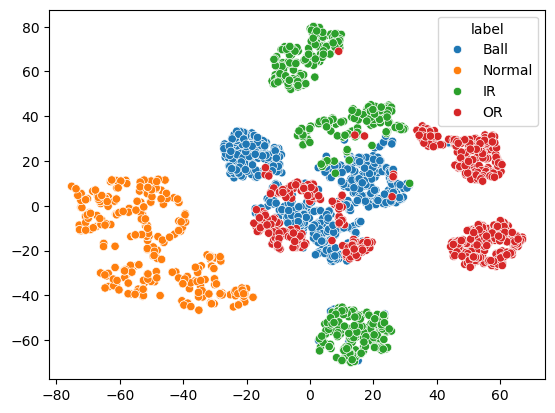

In [80]:
sns.scatterplot(x=x_tsne[:,0],y=x_tsne[:,1],hue=Y)

In [81]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,random_state=42,test_size=0.3)
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [82]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [83]:
model.fit(train_x,train_y)

RandomForestClassifier()

In [84]:
yp = model.predict(test_x)

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(f"accuracy: {accuracy_score(y_pred=yp,y_true=test_y)}")


accuracy: 0.9836065573770492
